In [6]:
from collections import defaultdict
import requests
from time import sleep
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re
from datetime import datetime, timedelta, time
from urllib.error import HTTPError
import statistics

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#
cur_working_directiory = os.getcwd()
# Change 
os.chdir("../../Data/")


CSVfiles = []
for file in os.listdir("./"):
  if file.endswith(".csv"):
    CSVfiles.append(file)
print(CSVfiles)


unixTimeConverter = lambda x : (datetime.fromtimestamp(x)).strftime('%Y-%m-%d %H:%M:%S')
unixTimeConverterNoDateJustTime = lambda x: (datetime.fromtimestamp(x) - timedelta(hours=4)).time()


allDfs = []


for x in CSVfiles:

  dfTemp = pd.read_csv(x)
  dfTemp['estTime']  = dfTemp['time'].apply(unixTimeConverter)
  dfTemp['timeOnly'] = dfTemp['time'].apply(unixTimeConverterNoDateJustTime)

  dfTemp['candleHeight']  = dfTemp.apply( lambda row:    max(row['open'],  row['close']) - min(row['open'],  row['close']), axis = 1 )
  allDfs.append(dfTemp)

df = allDfs[3]
#This is for generating if profit
for i in range(1, 15):
  df['P/L' +str(i) +'Short_']  = ( df['close'] - df['close'].shift(-i) )
  df['P/L' +str(i) +'Long_']  =  (  df['close'].shift(-i) - df['close']     )
  df['P/L' +str(i) +'Short']  = ( df['close'] - df['close'].shift(i) )
  df['P/L' +str(i) +'Long']  =  (  df['close'].shift(i) - df['close']     )

df = df.tail(-15)


os.chdir(cur_working_directiory)
print(df.shape)
df.head()

['OANDA EURUSD, 5(2).csv', 'OANDA EURUSD, 240(1).csv', 'OANDA EURUSD, 60(3).csv', 'OANDA EURUSD, 30(4).csv']
(17757, 74)


,time,open,high,low,close,Volume,Volume MA,OnBalanceVolume,Smoothing Line,ADX,...,P/L12Short,P/L12Long,P/L13Short_,P/L13Long_,P/L13Short,P/L13Long,P/L14Short_,P/L14Long_,P/L14Short,P/L14Long
15,1644813000,1.13469,1.13487,1.13448,1.13454,1711,3034.35,-208647,-207768.8,30.498465,...,0.00020,-0.00020,0.00424,-0.00424,0.00027,-0.00027,0.00343,-0.00343,-0.00018,0.00018
16,1644814800,1.13454,1.13482,1.13420,1.13477,1615,2380.00,-207032,-207494.4,30.589446,...,-0.00123,0.00123,0.00366,-0.00366,0.00043,-0.00043,0.00391,-0.00391,0.00050,-0.00050
17,1644816600,1.13477,1.13524,1.13473,1.13516,1133,2143.30,-205899,-207389.6,29.969753,...,-0.00130,0.00130,0.00430,-0.00430,-0.00084,0.00084,0.00244,-0.00244,0.00082,-0.00082
18,1644818400,1.13516,1.13522,1.13442,1.13484,1543,1963.85,-207442,-207191.2,29.707394,...,-0.00152,0.00152,0.00212,-0.00212,-0.00162,0.00162,0.00214,-0.00214,-0.00116,0.00116
19,1644820200,1.13484,1.13486,1.13388,1.13444,1958,1915.50,-209400,-207684.0,29.965298,...,-0.00182,0.00182,0.00174,-0.00174,-0.00192,0.00192,0.00292,-0.00292,-0.00202,0.00202


In [7]:
d_counts_average_vol            = defaultdict(list)
d_counts_average_highLow_diff   = defaultdict(list)


closeOpenDeltaList = []
closeOpenDeltaList_ = []
openLowDeltaList = []
highLowDeltaList = []

for index, row in df.iterrows():
  closeOpenDeltaList.append(abs(row['close'] - row['open']))
  closeOpenDeltaList_.append(row['close'] - row['open'])
  openLowDeltaList.append(abs(row['open'] - row['low']))
  highLowDeltaList.append(row['high'] - row['low'])


df1 = pd.DataFrame({'closeOpenDelta': closeOpenDeltaList, 'CloseOpenDelta_': closeOpenDeltaList_, 'openLowDelta': openLowDeltaList, 'highLowDelta': highLowDeltaList})

# df2 = pd.concat([df, df1])

df2 = pd.concat([df.reset_index(drop=True), df1.reset_index(drop=True)], axis=1)
print("mnath should add up")
print(df.shape)
print(df1.shape)
print(df2.shape)
df= df2

for index, row in df.iterrows():
  #put volumes in d
  time_  = str(row['timeOnly'])
  volume = row['Volume']
  d_counts_average_vol[str(time_)].append(volume)


  #Collecting, using a dictionary of lists to collect the price deltas for each time
  price_delta = row['closeOpenDelta']
  d_counts_average_highLow_diff[str(time_)].append(price_delta)

df.head()

###############################################
##THIS use to be seperate cells, but now I just combined them
##
################################################
import statistics

std_values_with_time_as_keys = {}
mean_values_with_time_as_keys = {}

#for volume
std_values_with_time_as_keys_volume = {}
mean_values_with_time_as_keys_volume = {}

for k , v in d_counts_average_highLow_diff.items():

  # Calculate mean and standard deviation of the sample for price delta
  mean = statistics.mean(v)
  std_dev = statistics.stdev(v)
  std_values_with_time_as_keys[k] = std_dev
  mean_values_with_time_as_keys[k] = mean

for k , v in d_counts_average_vol.items():
  # Calculate mean and standard deviation of the sample of volume
  mean__ = statistics.mean(v)
  std_dev__ = statistics.stdev(v)
  std_values_with_time_as_keys_volume[k] = std_dev__
  mean_values_with_time_as_keys_volume[k] = mean__


z_score_list = []
z_score_volume_list = []

for index, row in df.iterrows():
  time_  = str(row['timeOnly'])
  mean_ = mean_values_with_time_as_keys[time_]
  std_ = std_values_with_time_as_keys[time_]

  cur_val = row['closeOpenDelta']
  z_score_list.append(( cur_val - mean)/ std_)
  # row['z-score'] = (row['closeOpenDelta'] - mean)/ std_
  
  mean_ = mean_values_with_time_as_keys_volume[time_]
  std_ = std_values_with_time_as_keys_volume[time_]
  df.loc[index, 'z-score-volume'] = (row['Volume'] - mean)/ std_

df['z-score']= z_score_list 
# df['z-score-volume']= 


df.head(1)


mnath should add up
(17757, 74)
(17757, 4)
(17757, 78)


,time,open,high,low,close,Volume,Volume MA,OnBalanceVolume,Smoothing Line,ADX,...,P/L14Short_,P/L14Long_,P/L14Short,P/L14Long,closeOpenDelta,CloseOpenDelta_,openLowDelta,highLowDelta,z-score-volume,z-score
0,1644813000,1.13469,1.13487,1.13448,1.13454,1711,3034.35,-208647,-207768.8,30.498465,...,0.00343,-0.00343,-0.00018,0.00018,0.00015,-0.00015,0.00021,0.00039,2.115851,-0.590446


In [27]:
""" 
This is a split test, curious to see if having a 
low openLowDelta, along with a 4+ z-score, will
increase a higher profitablity rate.
"""

totalProfShort = defaultdict(float)
totalProfLong  = defaultdict(float)
totalPro       = defaultdict(float)

#Note this is actually shorting, I am doing the opposite of the 
#Large directional move, hence mean reversion
totalProfLongList = defaultdict(list)
#Comparing this 
#to see if only buy when the open and low are close together
totalProfLongListWithLowOpenLowDelata = defaultdict(list)
totalProfLongWithLowOpenLowDelta      = defaultdict(float)
#
#to see if only buy when the open and low are FAR away
totalProfLongListWithHighOpenLowDelata = defaultdict(list)
totalProfLongWithHighOpenLowDelta      = defaultdict(float)
#
#volume filter
totalProfLongListWithHighVolume = defaultdict(list)
totalProfLongWithHighVolume      = defaultdict(float)
totalProfLongListWithLowVolume = defaultdict(list)
totalProfLongWithLowVolume      = defaultdict(float)
#to see if only buy when the open and low are close together
totalProfLongListWithLowOpenLowDelata_filter_big_moves = defaultdict(list)
totalProfLongWithLowOpenLowDelta_filter_big_moves      = defaultdict(float)
# filter for only the largest moves
totalProfLongListWithLowOpenLowDelata_filter_most_moves = defaultdict(list)
totalProfLongWithLowOpenLowDelta_filter_most_moves      = defaultdict(float)


# With Stop Losses
totalProfLongListStopLoss = defaultdict(list)
totalProfLongStopLoss  = defaultdict(float)



# With Stop Losses
totalProfLongListStopLoss_RSI_high = defaultdict(list)
totalProfLongStopLoss_RSI_high  = defaultdict(float)


# With Stop Losses
totalProfLongList_RSI_Volume = defaultdict(list)
totalProfLong_RSI_Volume  = defaultdict(float)


# With Stop Losses
totalProfLongList_RSI_Volume_spreadLowOpen = defaultdict(list)
totalProfLong_RSI_Volume_spreadLowOpen  = defaultdict(float)


# allBigSDMoves
for index, row in df.iterrows():
  if row['z-score'] >= 3:
    if row['CloseOpenDelta_'] > 0:
      for i in range(1,15):
        lookup = 'P/L' + str(i) +'Short'
        totalProfLong[lookup] +=row[lookup]
        totalProfLongList[lookup].append(row[lookup])
        #print(row['CloseOpenDelta_'])
        if row['openLowDelta'] <= 0.00006:
          totalProfLongWithLowOpenLowDelta[lookup] +=row[lookup]
          totalProfLongListWithLowOpenLowDelata[lookup].append(row[lookup])
        if row['openLowDelta'] > 0.00006:
          totalProfLongWithHighOpenLowDelta[lookup] +=row[lookup]
          totalProfLongListWithHighOpenLowDelata[lookup].append(row[lookup])
        if row['z-score-volume'] >= 2:
          totalProfLongWithHighVolume[lookup] +=row[lookup]
          totalProfLongListWithHighVolume[lookup].append(row[lookup])
        if row['z-score'] <= 4:
          totalProfLongListWithLowOpenLowDelata_filter_big_moves[lookup].append(row[lookup])
          totalProfLongWithLowOpenLowDelta_filter_big_moves[lookup] +=row[lookup]
        if row['z-score'] >= 4.2:
          totalProfLongWithLowOpenLowDelta_filter_most_moves[lookup] +=row[lookup]
          totalProfLongListWithLowOpenLowDelata_filter_most_moves[lookup].append(row[lookup])
        if row['RSI'] < 80:
          totalProfLongListStopLoss_RSI_high[lookup].append(row[lookup])
          totalProfLongStopLoss_RSI_high[lookup] +=row[lookup]
        if row['RSI'] < 80 and row['z-score-volume'] >= 2:
          totalProfLongList_RSI_Volume[lookup].append(row[lookup])
          totalProfLong_RSI_Volume[lookup] +=row[lookup]
        if row['RSI'] < 80 and row['z-score-volume'] >= 2 and row['openLowDelta'] > 0.00006:
          totalProfLongList_RSI_Volume_spreadLowOpen[lookup].append(row[lookup])
          totalProfLong_RSI_Volume_spreadLowOpen[lookup] +=row[lookup]

        
  if row['z-score'] >= 3:
    if row['CloseOpenDelta_'] > 0:
      bought_value = row['close']
      for i in range(1,10):
        stopLoss = 0.003
        lookup = 'P/L' + str(i) +'Short'
        if df.iloc[index+i]['high'] - bought_value > stopLoss:
          totalProfLongStopLoss[lookup] -= stopLoss
          totalProfLongListStopLoss[lookup].append(-stopLoss)
          break
        else:
          totalProfLongStopLoss[lookup] += row[lookup]
          totalProfLongListStopLoss[lookup].append(row[lookup])



  
      


###################
#Print Stats

def whoIsLargest(a,b,c,d):
  if a > b and a > c and a > d:
    return "no filter"
  if b > a and b > c and b > d:
    return "small open low delta"
  if c > a and c > b and c > d:
    return "large open low delta"
  if d > a and d > b and d > c:
    return "high volume"
  return "all are equal"
def whoIsSmallest(a,b,c,d):
  if a < b and a < c and a < d:
    return "no filter"
  if b < a and b < c and b < d:
    return "small open low delta"
  if c < a and c < b and c < d:
    return "large open low delta"
  if d < a and d < b and d < c:
    return "high volume"
  return "all are equal"
  
# for k, v in totalProfLong.items():
#   print(k, "any z-score", v, "filtered out with only low open low delta", totalProfLongWithLowOpenLowDelta[k], "diff", v - totalProfLongWithLowOpenLowDelta[k])

#Note total doesn't seem to matter much because the filters force less trades
for k, v in totalProfLongList.items():
  print("--------------------")
  print(k, "first is no filter, second is filtered out with only low open low delta")
  print(  "mean",  sum(v)/len(v), "std", statistics.stdev(v), "median", statistics.median(v), "max", max(v), "min", min(v), "total", sum(v))
  print(  "mean",  sum(totalProfLongListWithLowOpenLowDelata[k])/len(totalProfLongListWithLowOpenLowDelata[k]), "std", statistics.stdev(totalProfLongListWithLowOpenLowDelata[k]), "median", statistics.median(totalProfLongListWithLowOpenLowDelata[k]), "max", max(totalProfLongListWithLowOpenLowDelata[k]), "min", min(totalProfLongListWithLowOpenLowDelata[k]), )
  print(  "mean",  sum(totalProfLongListWithHighOpenLowDelata[k])/len(totalProfLongListWithHighOpenLowDelata[k]), "std", statistics.stdev(totalProfLongListWithHighOpenLowDelata[k]), "median", statistics.median(totalProfLongListWithHighOpenLowDelata[k]), "max", max(totalProfLongListWithHighOpenLowDelata[k]), "min", min(totalProfLongListWithHighOpenLowDelata[k]))
  print(  "mean",  sum(totalProfLongListWithHighVolume[k])/len(totalProfLongListWithHighVolume[k]), "std", statistics.stdev(totalProfLongListWithHighVolume[k]), "median", statistics.median(totalProfLongListWithHighVolume[k]), "max", max(totalProfLongListWithHighVolume[k]), "min", min(totalProfLongListWithHighVolume[k]) )
  print( "mean",  sum(totalProfLongListWithLowOpenLowDelata_filter_big_moves[k])/len(totalProfLongListWithLowOpenLowDelata_filter_big_moves[k]), "std", statistics.stdev(totalProfLongListWithLowOpenLowDelata_filter_big_moves[k]), "median", statistics.median(totalProfLongListWithLowOpenLowDelata_filter_big_moves[k]), "max", max(totalProfLongListWithLowOpenLowDelata_filter_big_moves[k]), "min", min(totalProfLongListWithLowOpenLowDelata_filter_big_moves[k]))
  print( "mean",  sum(totalProfLongListWithLowOpenLowDelata_filter_most_moves[k])/len(totalProfLongListWithLowOpenLowDelata_filter_most_moves[k]), "std", statistics.stdev(totalProfLongListWithLowOpenLowDelata_filter_most_moves[k]), "median", statistics.median(totalProfLongListWithLowOpenLowDelata_filter_most_moves[k]), "max", max(totalProfLongListWithLowOpenLowDelata_filter_most_moves[k]), "min", min(totalProfLongListWithLowOpenLowDelata_filter_most_moves[k]))
  
  if len(totalProfLongListStopLoss[k]) > 0 : print( "mean",  sum(totalProfLongListStopLoss[k])/len(totalProfLongListStopLoss[k]), "std", statistics.stdev(totalProfLongListStopLoss[k]), "median", statistics.median(totalProfLongListStopLoss[k]), "max", max(totalProfLongListStopLoss[k]), "min", min(totalProfLongListStopLoss[k]))
  print("mean", sum(totalProfLongListStopLoss_RSI_high[k])/len(totalProfLongListStopLoss_RSI_high[k]), "std", statistics.stdev(totalProfLongListStopLoss_RSI_high[k]), "median", statistics.median(totalProfLongListStopLoss_RSI_high[k]), "max", max(totalProfLongListStopLoss_RSI_high[k]), "min", min(totalProfLongListStopLoss_RSI_high[k]))
  # mean_ = whoIsLargest(sum(v)/len(v), sum(totalProfLongListWithLowOpenLowDelata[k])/len(totalProfLongListWithLowOpenLowDelata[k]), sum(totalProfLongListWithHighOpenLowDelata[k])/len(totalProfLongListWithHighOpenLowDelata[k]), sum(totalProfLongListWithHighVolume[k])/len(totalProfLongListWithHighVolume[k]))
  # std_  = whoIsSmallest(statistics.stdev(v), statistics.stdev(totalProfLongListWithLowOpenLowDelata[k]), statistics.stdev(totalProfLongListWithHighOpenLowDelata[k]), statistics.stdev(totalProfLongListWithHighVolume[k]))
  # print("winners", "---mean---" , mean_, "---std---", std_)
# 
# print(len(totalProfLongList))

#plots

                                                     
# "total", sum(totalProfLongListWithLowOpenLowDelata[k]) ,                
# "total", ,               
#  ,                      
# "total", sum(totalProfLongListWithLowOpenLowDelata_filter_big_moves[k]) 
# "total", sum(totalProfLongListWithLowOpenLowDelata_filter_most_moves[k])


import inspect

def print_variable_name(var):
    # Get the current frame
    current_frame = inspect.currentframe()

    # Get the caller's frame (the frame where the function is called)
    caller_frame = current_frame.f_back

    # Get the caller's local variables dictionary
    local_vars = caller_frame.f_locals

    # Find the variable name by searching for its value in the local variables
    var_name = [name for name, value in local_vars.items() if value is var][0]

    # Print the variable name and its value
    print(f"Variable name: {var_name}, Value: {var}")

--------------------
P/L1Short first is no filter, second is filtered out with only low open low delta
mean 0.0032418691588785025 std 0.0016798418944388622 median 0.0028900000000000037 max 0.016390000000000016 min 0.0009799999999999809 total 0.6937599999999995
mean 0.0028749295774647883 std 0.0014673220244858492 median 0.0027200000000000557 max 0.008869999999999933 min 0.0012699999999999934
mean 0.0034240559440559407 std 0.0017523413865101632 median 0.003049999999999997 max 0.016390000000000016 min 0.0009799999999999809
mean 0.003357499999999999 std 0.0017466921899857905 median 0.002929999999999988 max 0.016390000000000016 min 0.0009799999999999809
mean 0.0025038053097345163 std 0.0007916058707553889 median 0.0025599999999998957 max 0.005739999999999967 min 0.0009799999999999809
mean 0.004133666666666658 std 0.0020958725891886553 median 0.003829999999999889 max 0.016390000000000016 min 0.0011799999999999589
mean 0.0024917289719626145 std 0.0021938320069129543 median 0.00267999999999996

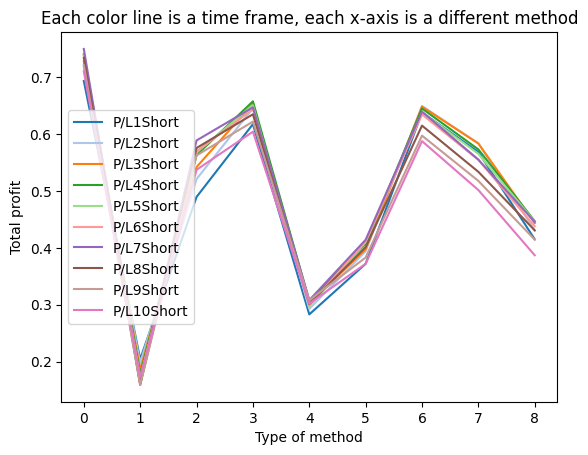

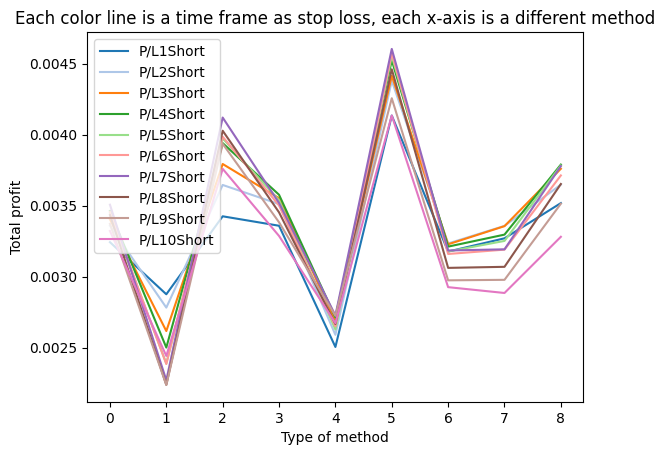

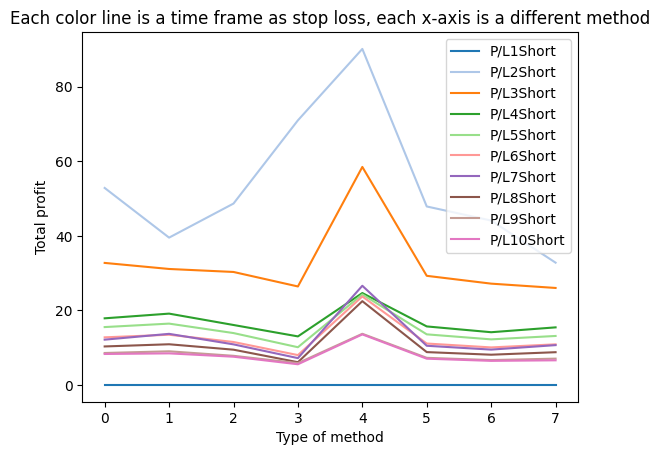

In [39]:
import numpy as np

colors = ['red', 'blue', 'yellow', 'green', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan']
colors = plt.cm.tab20(np.linspace(0, 1, 15))

i = 0
# Plot each array with a different color
for k, v in totalProfLongList.items():

    t1 = sum(v)
    t2 = sum(totalProfLongListWithLowOpenLowDelata[k])
    t3 = sum(totalProfLongListWithHighOpenLowDelata[k])
    t4 = sum(totalProfLongListWithHighVolume[k])
    t5 = sum(totalProfLongListWithLowOpenLowDelata_filter_big_moves[k])
    t6 = sum(totalProfLongListWithLowOpenLowDelata_filter_most_moves[k])
    t7 = sum(totalProfLongListStopLoss_RSI_high[k])
    t8 = sum(totalProfLongList_RSI_Volume[k])
    t9 = sum(totalProfLongList_RSI_Volume_spreadLowOpen[k])  
    data = [t1, t2, t3, t4, t5, t6, t7, t8, t9]
    plt.plot(data, color=colors[i], label=k)
    i += 1
    if i > 9: break

# Customize the plot
plt.xlabel('Type of method')
plt.ylabel('Total profit')
plt.title('Each color line is a time frame, each x-axis is a different method')
plt.legend()

# Show the plot
plt.show()




colors = ['red', 'blue', 'yellow', 'green', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan']
colors = plt.cm.tab20(np.linspace(0, 1, 15))

i =0 
# Plot each array with a different color
for k, v in totalProfLongList.items():

    t1 = sum(v)/len(v)
    t2 = sum(totalProfLongListWithLowOpenLowDelata[k])/len(totalProfLongListWithLowOpenLowDelata[k])
    t3 = sum(totalProfLongListWithHighOpenLowDelata[k])/len(totalProfLongListWithHighOpenLowDelata[k])
    t4 = sum(totalProfLongListWithHighVolume[k])/len(totalProfLongListWithHighVolume[k])
    t5 = sum(totalProfLongListWithLowOpenLowDelata_filter_big_moves[k])/len(totalProfLongListWithLowOpenLowDelata_filter_big_moves[k])
    t6 = sum(totalProfLongListWithLowOpenLowDelata_filter_most_moves[k])/len(totalProfLongListWithLowOpenLowDelata_filter_most_moves[k])
    t7 = sum(totalProfLongListStopLoss_RSI_high[k])/len(totalProfLongListStopLoss_RSI_high[k])
    t8 = sum(totalProfLongList_RSI_Volume[k])/len(totalProfLongList_RSI_Volume[k])  
    t9 = sum(totalProfLongList_RSI_Volume_spreadLowOpen[k])/len(totalProfLongList_RSI_Volume_spreadLowOpen[k])
    data = [t1, t2, t3, t4, t5, t6, t7, t8, t9]
    plt.plot(data, color=colors[i], label=k)
    i += 1
    if i > 9: break

# Customize the plot
plt.xlabel('Type of method')
plt.ylabel('Total profit')
plt.title('Each color line is a time frame as stop loss, each x-axis is a different method')
plt.legend()

# Show the plot
plt.show()



def evOfList(ls):
    ls_p = [x for x in ls if x > 0]
    ls_n = [x for x in ls if x < 0]
    if len(ls_p) == 0:
        ls_p_average_profit = 0
    else:
        ls_p_average_profit = sum(ls_p)/len(ls)
    if len(ls_n) == 0:
        ls_n_average_profit = 0
    else:
        ls_n_average_profit = sum(ls_n)/len(ls)

    if ls_p_average_profit == 0:
        return 0
    if ls_n_average_profit == 0:
        return 0
    
    res = (ls_p_average_profit / ls_n_average_profit)

    return -res 


colors = ['red', 'blue', 'yellow', 'green', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan']
colors = plt.cm.tab20(np.linspace(0, 1, 15))

i =0 
# Plot each array with a different color
for k, v in totalProfLongList.items():

    v_p = [x for x in v if x > 0]
    v_n = [x for x in v if x < 0]
    v_p_average_profit = sum(v_p)/len(v)
    v_n_average_profit = sum(v_n)/len(v)

    t1 = evOfList(v)

    t2 = evOfList(totalProfLongListWithLowOpenLowDelata[k])
    
    t3 = evOfList(totalProfLongListWithHighOpenLowDelata[k])
    
    t4 = evOfList(totalProfLongListWithHighVolume[k])

    
    t5 = evOfList(totalProfLongListWithLowOpenLowDelata_filter_big_moves[k])

    
    t6 = evOfList(totalProfLongListWithLowOpenLowDelata_filter_most_moves[k])
    
    t7 = evOfList(totalProfLongListStopLoss_RSI_high[k])

    
    t8 = evOfList(totalProfLongList_RSI_Volume[k])


    t9 = evOfList(totalProfLongList_RSI_Volume_spreadLowOpen[k])

    data = [t1, t3, t4, t5, t6, t7, t8, t9]
    plt.plot(data, color=colors[i], label=k)
    i += 1
    if i > 9: break

# Customize the plot
plt.xlabel('Type of method')
plt.ylabel('Total profit')
plt.title('Each color line is a time frame as stop loss, each x-axis is a different method')
plt.legend()

# Show the plot
plt.show()